# Speech Act Classification using Support Vector Machines 
Where the output is a single label

Generating the sentences and labels from the Excel sheet

In [16]:
import pandas as pd

In [17]:
raw_data = pd.read_csv("../data/adjusted-labels-comms-exclusive.csv")

filtered_data = raw_data[raw_data["Label"] != "Other"]

In [18]:
sentences = filtered_data["Sentence"]
labels = filtered_data["Label"]

## Visualising the Data

In [19]:
filtered_data.head()

,Sentence,Label
0,ed in as the wind direction is heading west i ...,Buildings
1,charlie starts evacuations in greenhill in low...,Hills and Forests
2,now they can when you're on it just click on t...,Named Locations
3,charlie and said he won't firetruck down to yo...,Woods
4,charlie good job quality mission accomplished ...,Fire words


Distribution of the data

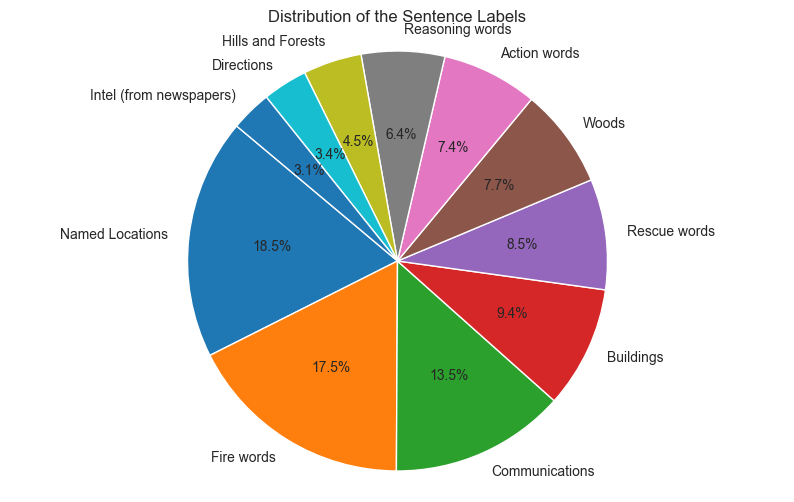

In [20]:
from matplotlib import pyplot as plt

label_counts = labels.value_counts()

plt.figure(figsize=(10, 6))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of the Sentence Labels")
plt.axis("equal")
plt.show()

## Preprocessing

Separating the data into training and test data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=47)

Vectorising based on the Tf-idf values in the data set

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,
                             max_df=0.8,
                             sublinear_tf=True,
                             use_idf=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

Selecting the Linear Support Vector Classification model

In [23]:
from sklearn import svm

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_rbf = svm.SVC(kernel="rbf")
classifier_polynomial = svm.SVC(kernel="poly")
classifier_sigmoid = svm.SVC(kernel="sigmoid")

In [24]:
classifier_linear.fit(train_vectors, y_train)
classifier_rbf.fit(train_vectors, y_train)
classifier_polynomial.fit(train_vectors, y_train)
classifier_sigmoid.fit(train_vectors, y_train)

SVC(kernel='sigmoid')

Evaluating Results

In [25]:
prediction_linear = classifier_linear.predict(test_vectors)
prediction_rbf = classifier_rbf.predict(test_vectors)
prediction_polynomial = classifier_polynomial.predict(test_vectors)
prediction_sigmoid = classifier_sigmoid.predict(test_vectors)

In [26]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test, prediction_linear, zero_division=0)
print("Classification Report: Adjusted Label Exclusive - Linear Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_linear):.2f}")
print(report)

Classification Report: Adjusted Label Exclusive - Linear Kernel
Accuracy: 0.37
                         precision    recall  f1-score   support

           Action words       0.23      0.24      0.23        51
              Buildings       0.24      0.22      0.23        78
         Communications       0.89      0.98      0.93       113
             Directions       0.38      0.29      0.32        21
             Fire words       0.36      0.41      0.38       138
      Hills and Forests       0.33      0.24      0.28        41
Intel (from newspapers)       0.21      0.29      0.24        21
        Named Locations       0.20      0.23      0.22       141
        Reasoning words       0.20      0.18      0.19        51
           Rescue words       0.25      0.23      0.24        73
                  Woods       0.38      0.19      0.26        67

               accuracy                           0.37       795
              macro avg       0.33      0.32      0.32       795
         

In [27]:
report = classification_report(y_test, prediction_sigmoid, zero_division=0)
print("Classification Report: Adjusted Label Exclusive - Sigmoid Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_sigmoid):.2f}")
print(report)

Classification Report: Adjusted Label Exclusive - Sigmoid Kernel
Accuracy: 0.43
                         precision    recall  f1-score   support

           Action words       0.26      0.27      0.27        51
              Buildings       0.31      0.28      0.29        78
         Communications       0.88      0.97      0.92       113
             Directions       0.43      0.29      0.34        21
             Fire words       0.44      0.53      0.48       138
      Hills and Forests       0.35      0.27      0.31        41
Intel (from newspapers)       0.25      0.33      0.29        21
        Named Locations       0.28      0.30      0.29       141
        Reasoning words       0.26      0.24      0.25        51
           Rescue words       0.35      0.36      0.35        73
                  Woods       0.45      0.21      0.29        67

               accuracy                           0.43       795
              macro avg       0.39      0.37      0.37       795
        

In [28]:
report = classification_report(y_test, prediction_rbf, zero_division=0)
print("Classification Report: Adjusted Label Exclusive - RBF Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_rbf):.2f}")
print(report)

Classification Report: Adjusted Label Exclusive - RBF Kernel
Accuracy: 0.29
                         precision    recall  f1-score   support

           Action words       0.21      0.18      0.19        51
              Buildings       0.15      0.14      0.15        78
         Communications       0.85      0.91      0.88       113
             Directions       0.33      0.19      0.24        21
             Fire words       0.30      0.37      0.33       138
      Hills and Forests       0.21      0.12      0.15        41
Intel (from newspapers)       0.07      0.05      0.06        21
        Named Locations       0.12      0.19      0.15       141
        Reasoning words       0.07      0.04      0.05        51
           Rescue words       0.18      0.14      0.16        73
                  Woods       0.26      0.12      0.16        67

               accuracy                           0.29       795
              macro avg       0.25      0.22      0.23       795
           w

In [29]:
report = classification_report(y_test, prediction_polynomial, zero_division=0)
print("Classification Report: Adjusted Label Exclusive - Polynomial Kernel")
print(f"Accuracy: {accuracy_score(y_test, prediction_polynomial):.2f}")
print(report)

Classification Report: Adjusted Label Exclusive - Polynomial Kernel
Accuracy: 0.15
                         precision    recall  f1-score   support

           Action words       0.00      0.00      0.00        51
              Buildings       0.02      0.01      0.02        78
         Communications       0.87      0.42      0.56       113
             Directions       0.00      0.00      0.00        21
             Fire words       0.23      0.32      0.27       138
      Hills and Forests       0.00      0.00      0.00        41
Intel (from newspapers)       0.00      0.00      0.00        21
        Named Locations       0.07      0.19      0.11       141
        Reasoning words       0.00      0.00      0.00        51
           Rescue words       0.00      0.00      0.00        73
                  Woods       0.00      0.00      0.00        67

               accuracy                           0.15       795
              macro avg       0.11      0.09      0.09       795
     

In [30]:
# highest_seed = 81
# highest_acc = 0
# report = None
# 
# for seed in range(100):
#     X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=seed)
#     
#     train_vectors = vectorizer.fit_transform(X_train)
#     test_vectors = vectorizer.transform(X_test)
#     classifier_linear = svm.SVC(kernel='linear')
#     classifier_linear.fit(train_vectors, y_train)
#     prediction_linear = classifier_linear.predict(test_vectors)
#     local_report = classification_report(y_test, prediction_linear, zero_division=0)
#     accuracy = accuracy_score(y_test, prediction_linear)
#     print("Seed: ", seed)
#     print(accuracy)
#     
#     if accuracy > highest_acc:
#         highest_acc = accuracy
#         highest_seed = seed
#         report = local_report
#         
# print(highest_seed)
# print(highest_acc)
# print(report)